In [54]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [55]:
df = pd.read_csv("Height-Weight Data.csv") #import data set

In [56]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [57]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Visualization

Text(0.5, 1.0, 'Height_Weight_plot')

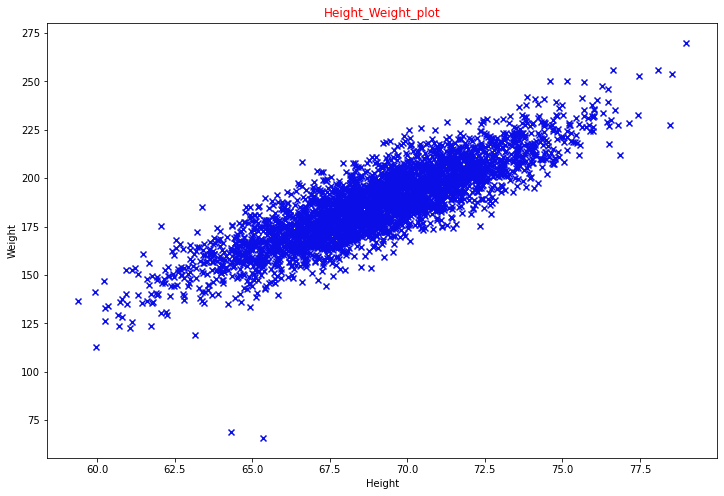

In [58]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height , df.Weight, marker='x' , color='#0B0EE6')
plt.xlabel('Height', color='black')
plt.ylabel('Weight')
plt.title('Height_Weight_plot', color='red')

In [59]:
x = df[['Height']] 
y = df['Weight']

In [60]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [61]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# Split data set into train and test

In [62]:
from sklearn.model_selection import train_test_split as tts

In [63]:
# train 70% ; test = 30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

In [64]:
xtrain.head()

,Height
798,65.726032
575,68.853354
1233,69.212011
221,66.786927
786,63.309969


In [65]:
ytrain.head()

798     169.675260
575     210.869084
1233    181.214073
221     165.431242
786     157.003544
Name: Weight, dtype: float64

# Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
reg = LinearRegression()

In [68]:
reg.fit(xtrain, ytrain) #training

LinearRegression()

In [69]:
m = reg.coef_
m

array([5.97475458])

In [70]:
c = reg.intercept_
c

-225.66279324141183

In [71]:
x1 = 68.781904
y = m*x1 + c

In [72]:
y

array([185.29220293])

In [73]:
reg.predict([[68.781904]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([185.29220293])

In [74]:
pred = reg.predict(xtest)

In [75]:
pred

array([182.33552231, 209.12967424, 176.73697395, ..., 204.8815613 ,
       231.24389626, 180.0443919 ])

In [76]:
df['predicted result'] = reg.predict(x)

In [77]:
df.head()

,Height,Weight,predicted result
0,73.847017,241.893563,215.555010
1,68.781904,162.310473,185.292203
2,74.110105,212.740856,217.126899
3,71.730978,220.042470,202.912199
4,69.881796,206.349801,191.863787


In [78]:
x1 = 73.847017
y = m * x1 + c
y

array([215.55501004])

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [80]:
mse = mean_squared_error(ytest,pred)
mse

92.22348367488392

In [81]:
mae = mean_absolute_error(ytest, pred)
mae

7.669787324546107

# Best fit line

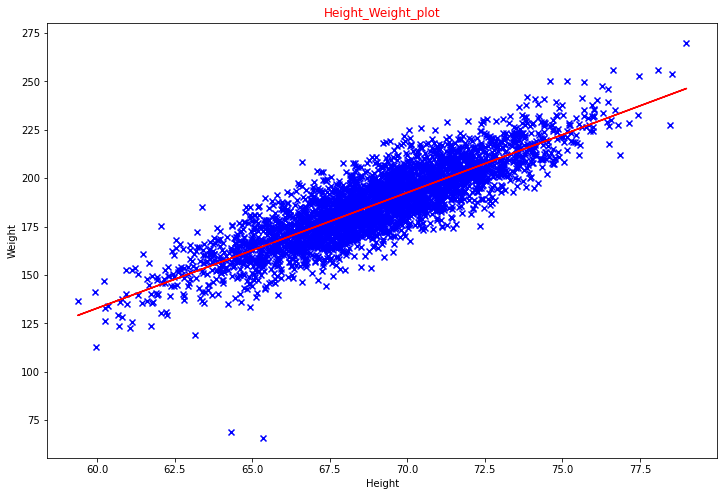

In [82]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height , df.Weight, marker='x' , color='blue')
plt.xlabel('Height', color='black')
plt.ylabel('Weight')
plt.title('Height_Weight_plot', color='red')
plt.plot(xtrain.squeeze() , reg.predict(xtrain), color='red')

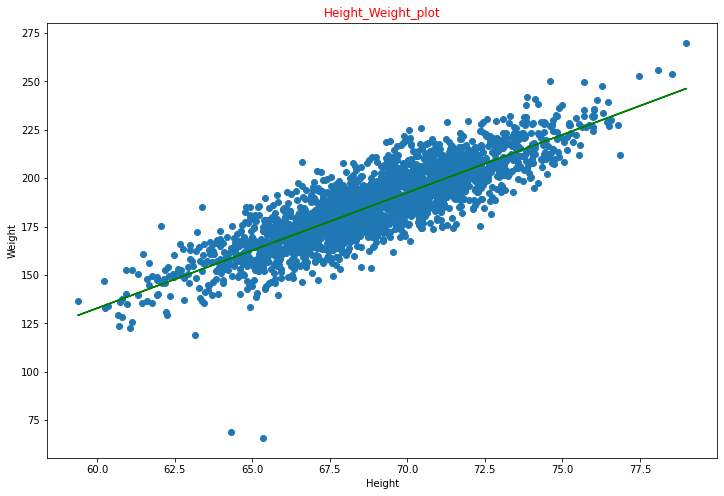

In [88]:
plt.figure(figsize=(12,8))
plt.xlabel('Height', color='black')
plt.ylabel('Weight', color= 'black')
plt.title('Height_Weight_plot', color='red')
plt.scatter(xtrain, ytrain)
plt.plot(xtrain.squeeze() , reg.predict(xtrain), color='green')

In [89]:
import warnings
warnings.filterwarnings('ignore')

reg.predict([[2500]])

array([14711.22366501])

In [90]:
reg.score(xtest, ytest)

0.7496837824301572

In [91]:
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.7496837824301572